In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("penguins")


In [3]:
print(df.head(10))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [4]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (344, 7)


In [5]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [7]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [8]:
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['Male' 'Female' nan]


In [ ]:
#univarient analysis

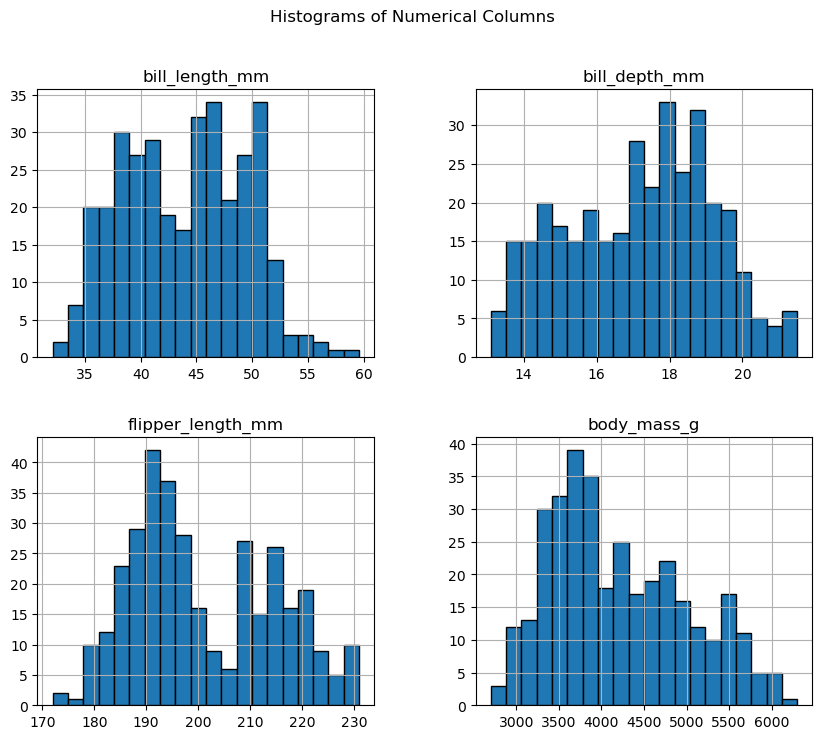

In [9]:
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[num_cols].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

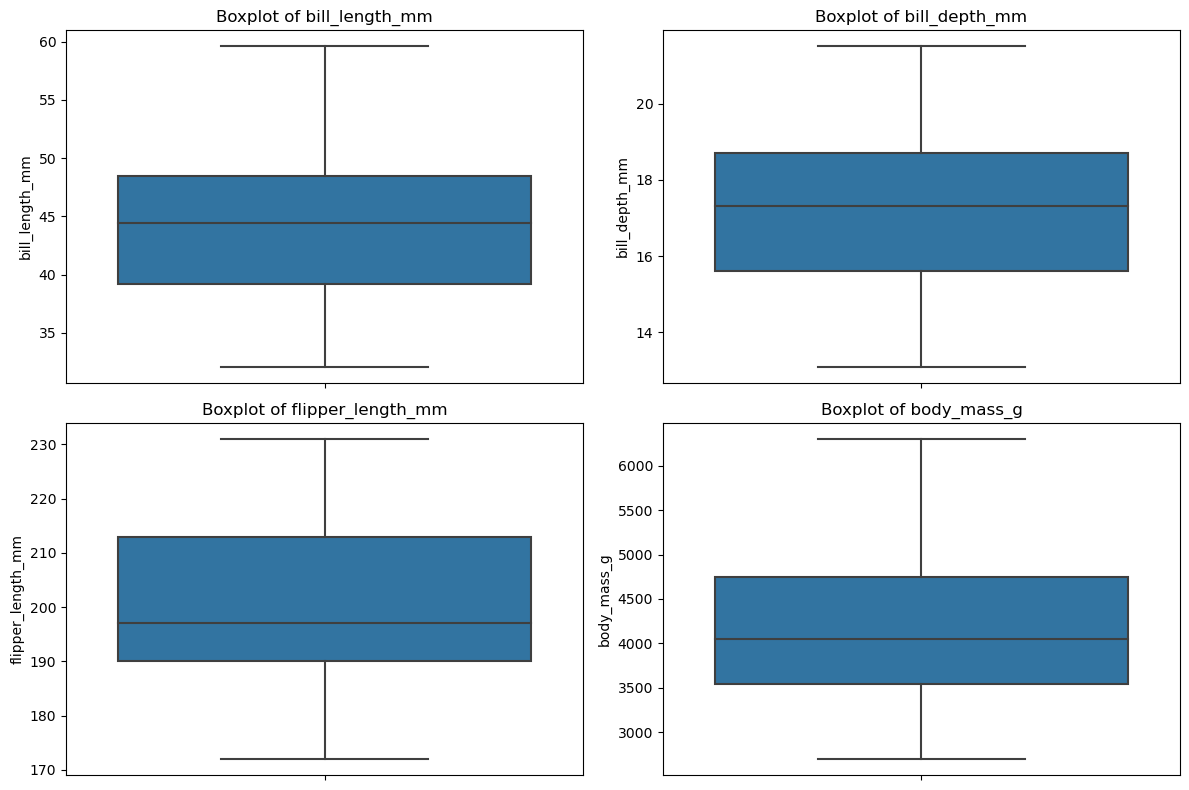

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

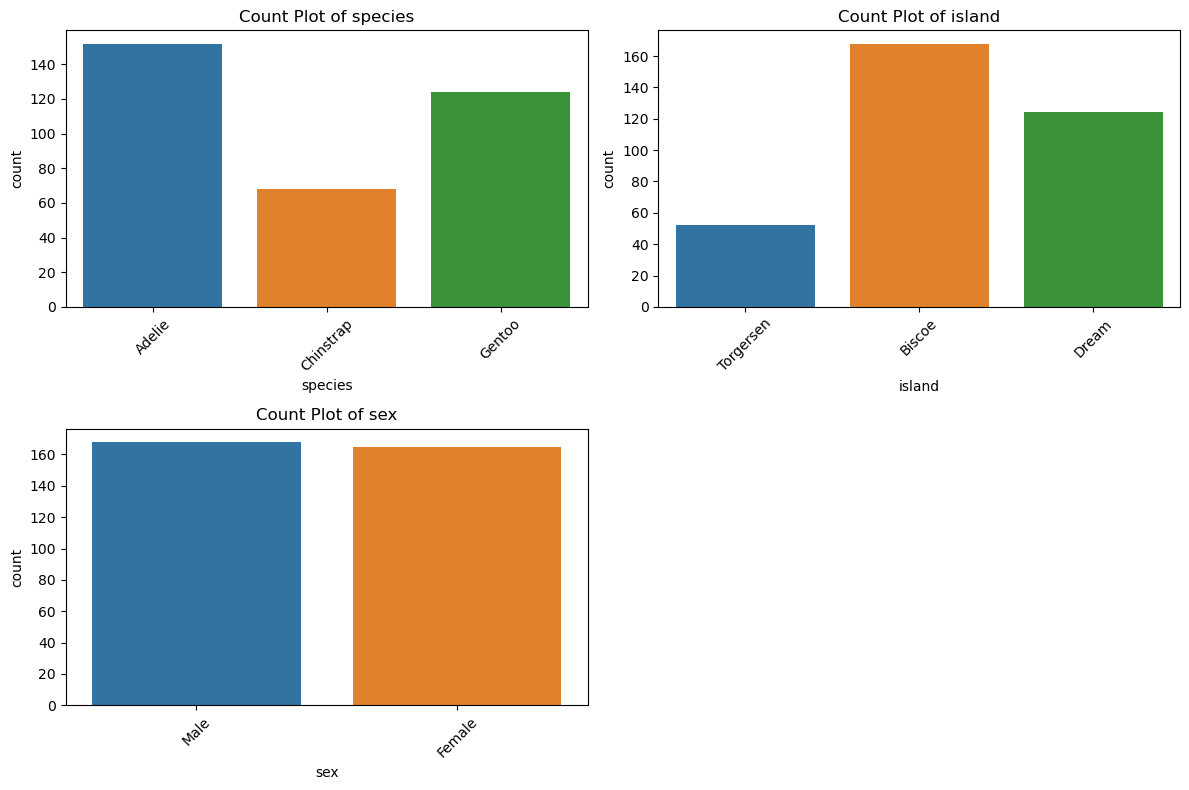

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
print("\nSkewness of numerical columns:")
print(df[num_cols].skew())


Skewness of numerical columns:
bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


In [13]:
#bivarient analysis

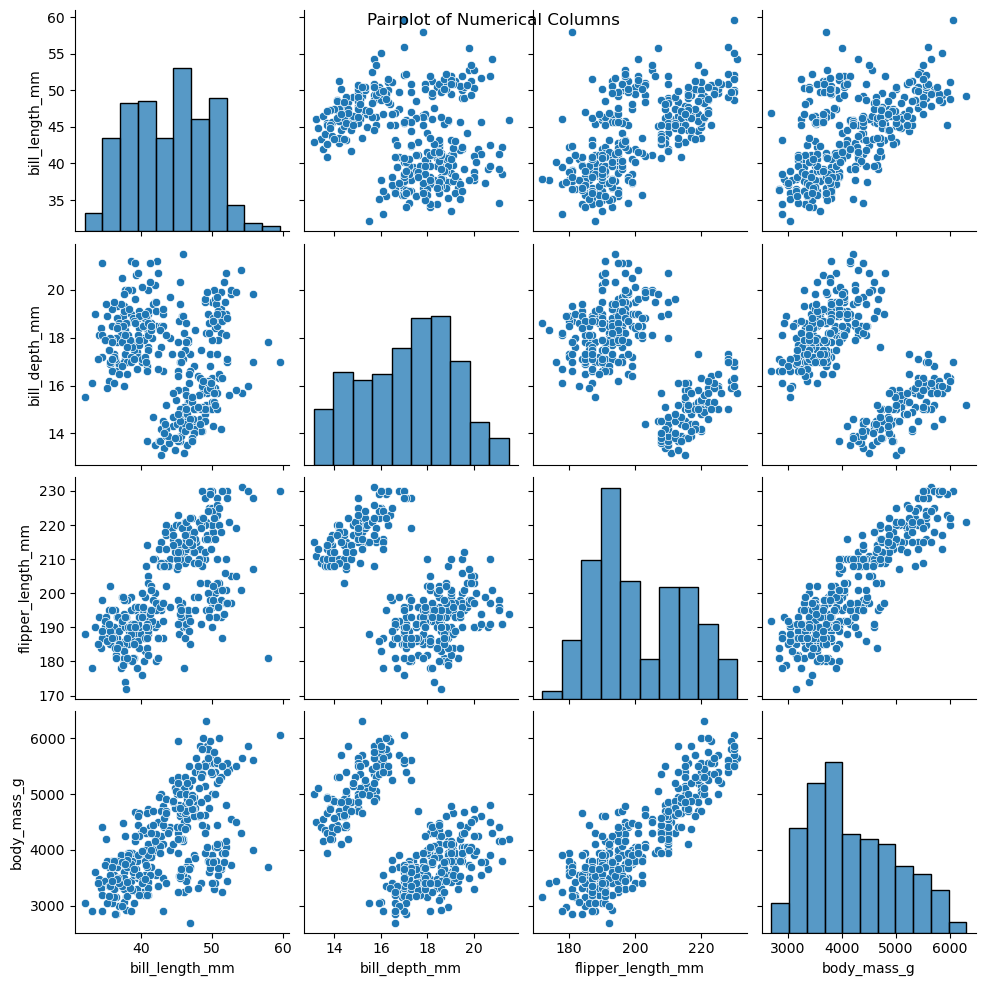

In [14]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Numerical Columns")
plt.show()

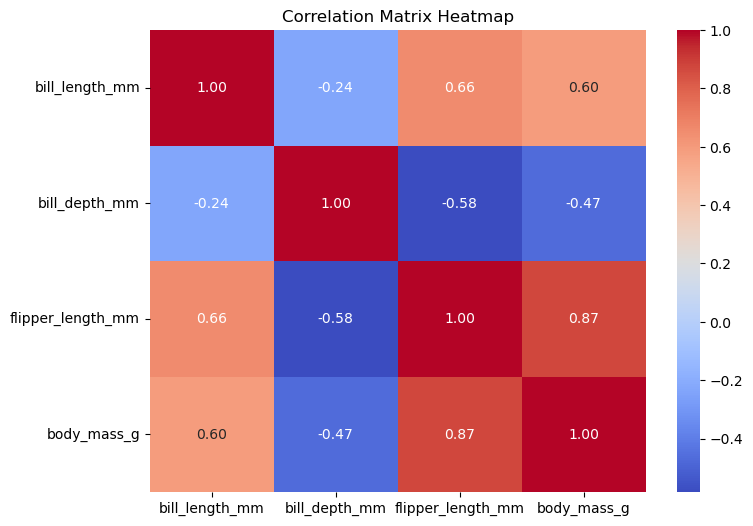

In [15]:
# Heatmap to display the correlation matrix of numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

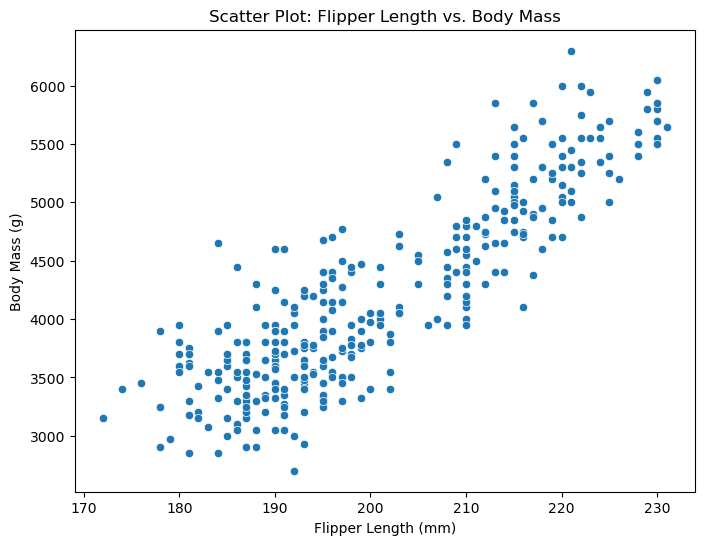

In [16]:
# Scatter plot between flipper length and body mass
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'])
plt.title("Scatter Plot: Flipper Length vs. Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

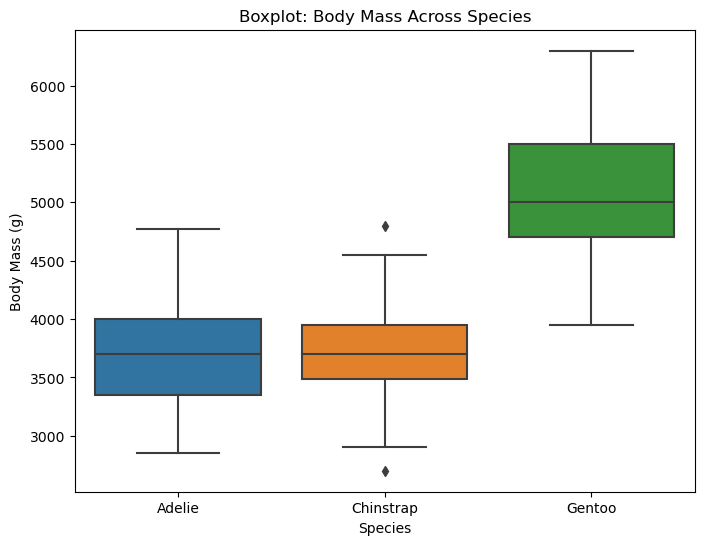

In [17]:
# Boxplot to compare body mass across different species
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['species'], y=df['body_mass_g'])
plt.title("Boxplot: Body Mass Across Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

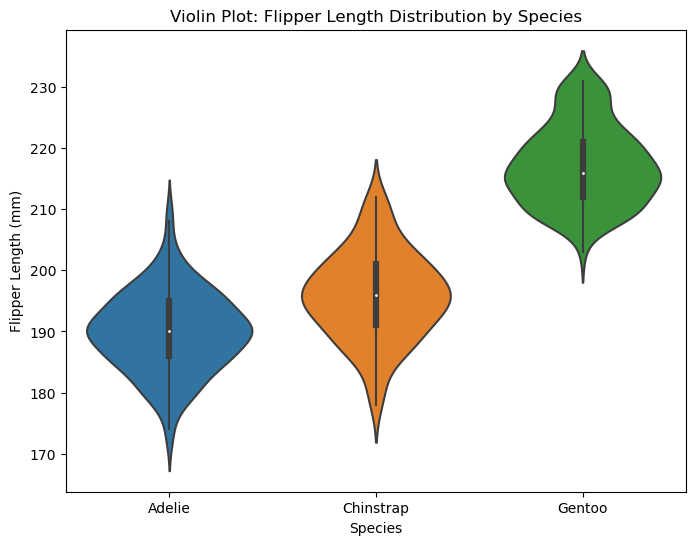

In [18]:
# Violin plot to visualize the distribution of flipper length by species
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['species'], y=df['flipper_length_mm'])
plt.title("Violin Plot: Flipper Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

In [19]:
# Train-Test Split
# Select features and target column
X = df.drop(columns=['species'])
y = df['species']

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
df.dropna(inplace=True)

In [23]:
# Perform an 80-20 train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train and test sets
print("\nShapes of train-test split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Shapes of train-test split:
X_train shape: (275, 7)
X_test shape: (69, 7)
y_train shape: (275,)
y_test shape: (69,)


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [25]:
# Feature Scaling
# Standardization (Z-score Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFirst 5 rows of standardized dataset:")
print(X_train_scaled.head())

# Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Convert back to DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

print("\nFirst 5 rows of normalized dataset:")
print(X_train_normalized.head())


First 5 rows of standardized dataset:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -1.515083      -0.436577          -0.432800    -1.062531   
1        0.538231      -0.840877           0.968940     1.179832   
2       -0.842759       1.281696          -0.432800     0.588098   
3       -0.661050       0.018260          -0.572974    -1.000243   
4        0.956162      -1.043027           1.880072     1.615848   

   island_Dream  island_Torgersen  sex_Male  
0     -0.750000         -0.406515 -0.960769  
1     -0.750000         -0.406515  1.040833  
2     -0.750000          2.459935  1.040833  
3      1.333333         -0.406515 -0.960769  
4     -0.750000         -0.406515  1.040833  

First 5 rows of normalized dataset:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.123636       0.369048           0.389831     0.180556   
1        0.534545       0.273810           0.728814     0.680556   
2        0.258182       0.773810   